In [1]:
%cd ~/repo/protein-transfer

/home/t-fli/repo/protein-transfer


In [2]:
%load_ext blackcellmagic

In [3]:
import torch

# Load ESM-1b model
original_model, alphabet = torch.hub.load(
            "facebookresearch/esm:main", model="esm1_t6_43M_UR50S"
        )
batch_converter = alphabet.get_batch_converter()
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG")
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

original_model.eval()
with torch.no_grad():
    original_results = original_model(batch_tokens, repr_layers=[6], return_contacts=False)
original_reps = original_results["representations"][6].numpy().mean(axis=1).flatten()

Using cache found in /home/t-fli/.cache/torch/hub/facebookresearch_esm_main


In [4]:
from scr.params.sys import DEVICE

In [5]:
import copy
model = copy.deepcopy(original_model).to(DEVICE)

pre_weights = {}
post_weights = {}
        
for name, param in model.named_parameters():
    if "layers.0" in name:
        pre_weights[name] = param.data
        param.data = torch.FloatTensor(param.shape).uniform_(param.min().detach(), param.max().detach())
        post_weights[name] = param.data


In [6]:
pre_weights.keys()

dict_keys(['layers.0.self_attn.bias_k', 'layers.0.self_attn.bias_v', 'layers.0.self_attn.k_proj.weight', 'layers.0.self_attn.k_proj.bias', 'layers.0.self_attn.v_proj.weight', 'layers.0.self_attn.v_proj.bias', 'layers.0.self_attn.q_proj.weight', 'layers.0.self_attn.q_proj.bias', 'layers.0.self_attn.out_proj.weight', 'layers.0.self_attn.out_proj.bias', 'layers.0.self_attn_layer_norm.weight', 'layers.0.self_attn_layer_norm.bias', 'layers.0.fc1.weight', 'layers.0.fc1.bias', 'layers.0.fc2.weight', 'layers.0.fc2.bias', 'layers.0.final_layer_norm.weight', 'layers.0.final_layer_norm.bias'])

In [7]:
import matplotlib.pyplot as plt

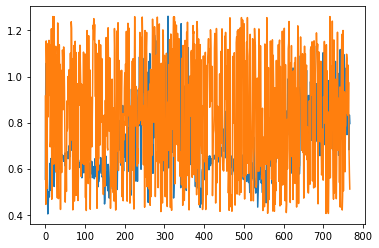

In [8]:
plt.plot(pre_weights["layers.0.final_layer_norm.weight"])
plt.plot(post_weights["layers.0.final_layer_norm.weight"])

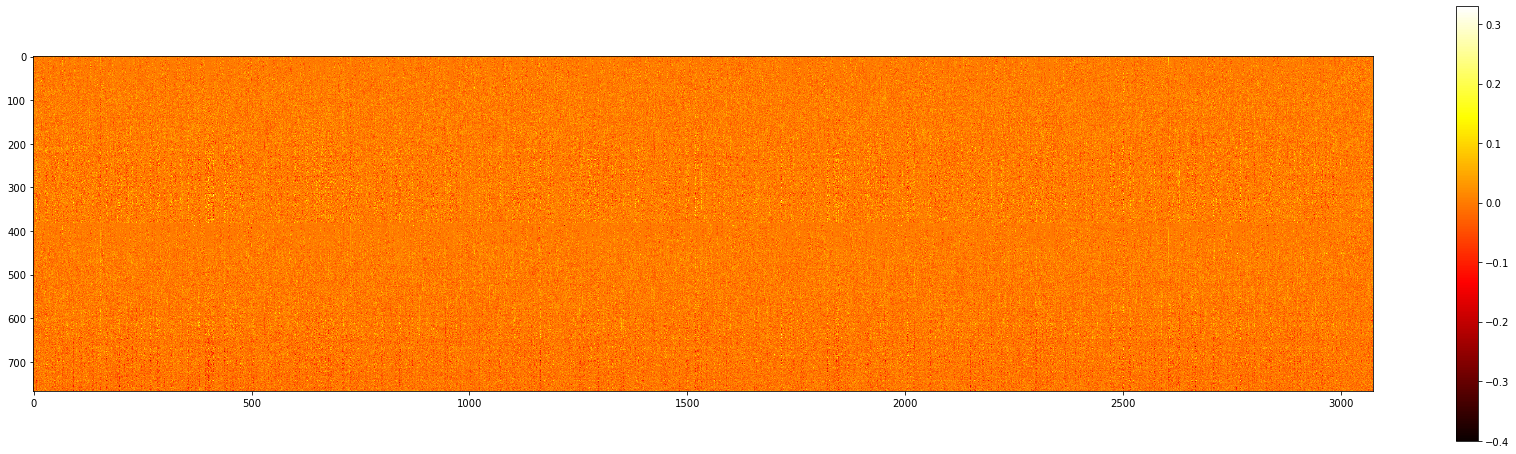

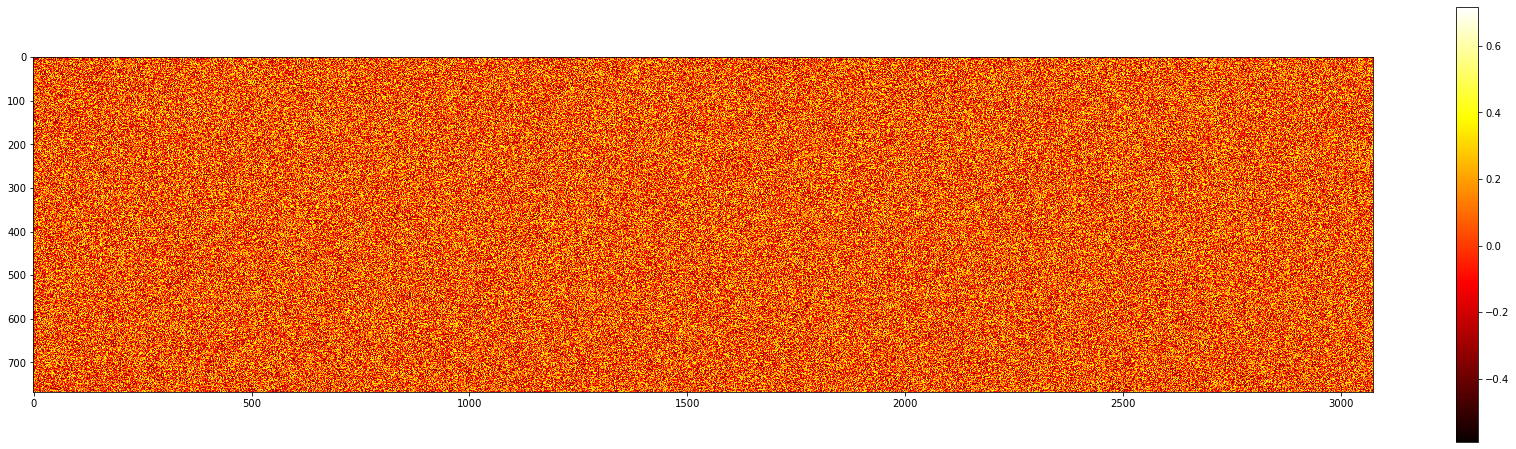

In [9]:
plt.figure(figsize=(30,8))
plt.imshow(pre_weights["layers.0.fc1.weight"].T, cmap="hot", interpolation='nearest')
plt.colorbar()
plt.figure(figsize=(30,8))
plt.imshow(pre_weights["layers.0.fc1.weight"].T - post_weights["layers.0.fc1.weight"].T, cmap="hot", interpolation='nearest')
plt.colorbar()

In [10]:
model.eval()  # disables dropout for deterministic results

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=False)
reps = results["representations"][6].numpy().mean(axis=1).flatten()

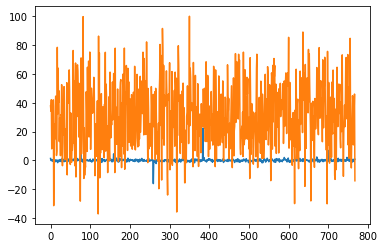

In [11]:
plt.plot(original_reps)
plt.plot(reps)

In [21]:
for layer in model.layers:
    print(layer, type(layer), dir(layer))

TransformerLayer(
  (self_attn): MultiheadAttention(
    (k_proj): Linear(in_features=768, out_features=768, bias=True)
    (v_proj): Linear(in_features=768, out_features=768, bias=True)
    (q_proj): Linear(in_features=768, out_features=768, bias=True)
    (out_proj): Linear(in_features=768, out_features=768, bias=True)
  )
  (self_attn_layer_norm): ESM1LayerNorm()
  (fc1): Linear(in_features=768, out_features=3072, bias=True)
  (fc2): Linear(in_features=3072, out_features=768, bias=True)
  (final_layer_norm): ESM1LayerNorm()
) <class 'esm.modules.TransformerLayer'> ['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', 

In [3]:
import torch

# Load ESM-1b model
original_model, alphabet = torch.hub.load(
            "facebookresearch/esm:main", model="esm1_t6_43M_UR50S"
        )
batch_converter = alphabet.get_batch_converter()
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG")
]
batch_labels, batch_strs, batch_tokens = batch_converter(data)

original_model.eval()
with torch.no_grad():
    original_results = original_model(batch_tokens, repr_layers=list(range(6)), return_contacts=False)

Using cache found in /home/t-fli/.cache/torch/hub/facebookresearch_esm_main


In [5]:
original_results["representations"].keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [ ]:

original_reps = original_results["representations"][6].numpy().mean(axis=1).flatten()